# D04 CNN 圖形辨識

Yann LeCun 被譽為 Deep Learning 的三巨頭之一。他的 CNN (Convolutional Neural Networks) 是讓 Neural Network 重新受到重視的主因之一。

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 讀入套件、準備資料

這裡我們新增一個 `Flatten` layer, 還有 `Conv2D`, `MaxPooling2D`, 使用訓練方式是 `Adadelta`, 這是參考原作的。

[Keras 範例集](https://github.com/fchollet/keras/blob/master/examples)

In [28]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adadelta

有些 backend 相關的資料

In [29]:
from keras import backend as K

In [30]:
K.image_data_format()

'channels_last'

In [31]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [32]:
x0_train.shape

(60000, 28, 28)

做 CNN 的時候我們可以直接把矩陣塞進去。不過一張彩色的圖通常有 R, G, B 三個矩陣, 但我們這是灰階只有一個。所以 (28, 28) 的矩陣要變成

* channels_last: (28, 28, 1)
* channels_first: (1, 28, 28)

注意很討厭的, 表示法是不一樣的!

In [33]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [34]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

確定一下一個訓練輸入長什麼樣子。

In [35]:
x_train.shape[1:]

(28, 28, 1)

## 2. 打造 CNN

CNN filter 一般是「越用越多」, 但要幾次 CNN, 是不是每次都要接 MaxPooling 可以自己決定!

In [36]:
model = Sequential()

注意這是 Keras 2 的寫法。我們這裡要用 10 個 3x3 的 filters。

In [37]:
model.add(Conv2D(10, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

然後每 2x2 的區域做 MaxPooling。

In [38]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
model.add(Conv2D(20, (3, 3), padding='same'))
model.add(Activation('relu'))

In [40]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
model.add(Conv2D(120, (3, 3), padding='same'))
model.add(Activation('relu'))

In [42]:
model.add(MaxPooling2D(pool_size=(2, 2)))

接著要送進一般的神經網路學了, 我們用一個 hidden layer, 200 個神經元。

In [43]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

最後輸出用 softmax 處理一下。

In [44]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [45]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adadelta(),
              metrics=['accuracy'])

## 3. 訓練和結果

In [46]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 1s - loss: 0.3311 - acc: 0.8981     
Epoch 2/12
60000/60000 [==============================] - 1s - loss: 0.0703 - acc: 0.9785     
Epoch 3/12
60000/60000 [==============================] - 1s - loss: 0.0507 - acc: 0.9844     
Epoch 4/12
60000/60000 [==============================] - 1s - loss: 0.0405 - acc: 0.9871     
Epoch 5/12
60000/60000 [==============================] - 1s - loss: 0.0338 - acc: 0.9894     
Epoch 6/12
60000/60000 [==============================] - 1s - loss: 0.0278 - acc: 0.9915     
Epoch 7/12
60000/60000 [==============================] - 1s - loss: 0.0243 - acc: 0.9924     
Epoch 8/12
60000/60000 [==============================] - 1s - loss: 0.0212 - acc: 0.9930     
Epoch 9/12
60000/60000 [==============================] - 1s - loss: 0.0181 - acc: 0.9941     
Epoch 10/12
60000/60000 [==============================] - 1s - loss: 0.0154 - acc: 0.9953     
Epoch 11/12
60000/60000 [========================

## 3. 看最後分數

我們把測試資料結果放 result。

In [21]:
result = model.predict_classes(x_test)

 9472/10000 [===========================>..] - ETA: 0s

隨便看 25 個數字的結果。

In [22]:
pick = np.random.randint(1,9999, 25)

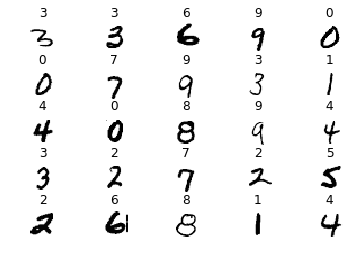

In [23]:
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.title(result[pick[i]])
    plt.axis("off")

看看分數。

In [24]:
score = model.evaluate(x_test, y_test)

 9856/10000 [============================>.] - ETA: 0s

In [25]:
loss, acc = score

In [26]:
print(acc)

0.9892
